In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [4]:
df=pd.read_csv('E:\\infosys\\Datasets-20250212T130626Z-001\\Datasets\\deliveries.csv')
print(df)

        match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

        over  ball       batter        

In [5]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [6]:
df1=df.fillna(0)

In [7]:
print(df1)

        match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

        over  ball       batter        

In [8]:
df1.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [9]:
print(df1.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


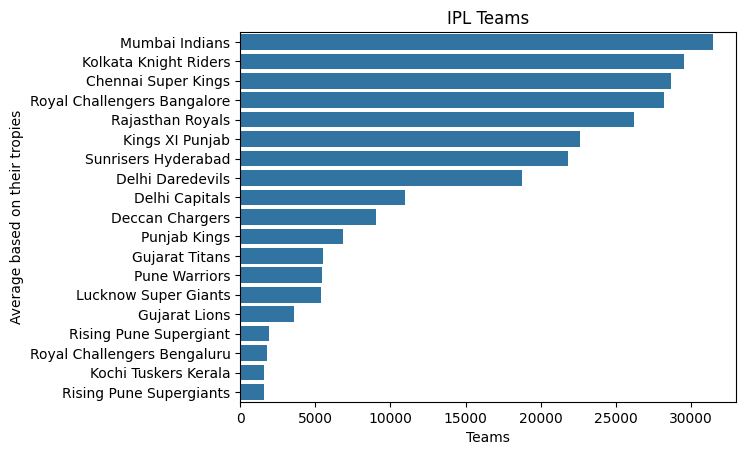

In [10]:
sns.countplot(y=df1['batting_team'], order=df1['batting_team'].value_counts().index)
plt.title('IPL Teams')
plt.xlabel('Teams')
plt.ylabel('Average based on their tropies')
plt.show()

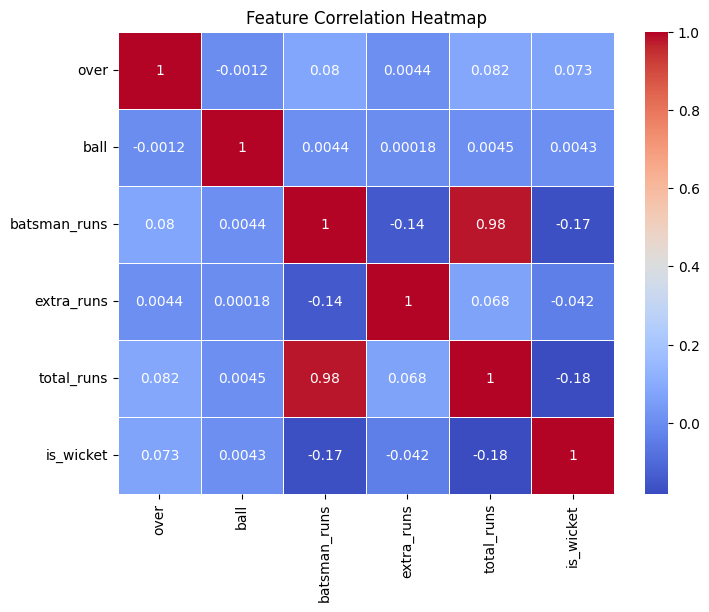

In [11]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

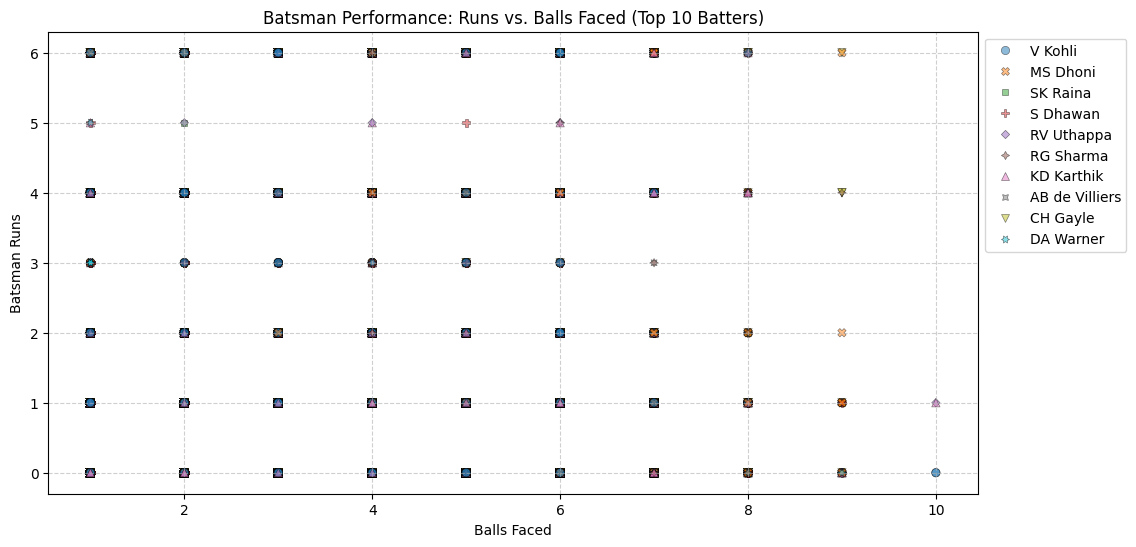

In [26]:
top_batters = df.groupby("batter")["batsman_runs"].sum().nlargest(10).index
df_top = df[df["batter"].isin(top_batters)]  # Filter dataset for top 10 batters

plt.figure(figsize=(12, 6))

# Scatter plot for top 10 batters
sns.scatterplot(
    x="ball", 
    y="batsman_runs", 
    data=df_top, 
    hue="batter", 
    style="batter",  # Different markers for each batter
    alpha=0.5,  # Transparency to reduce overlapping issues
    edgecolor="black"
)

plt.xlabel("Balls Faced")
plt.ylabel("Batsman Runs")
plt.title("Batsman Performance: Runs vs. Balls Faced (Top 10 Batters)")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(True, linestyle="--", alpha=0.6)  # Add a light grid for readability
plt.show()

<Figure size 1000x600 with 0 Axes>

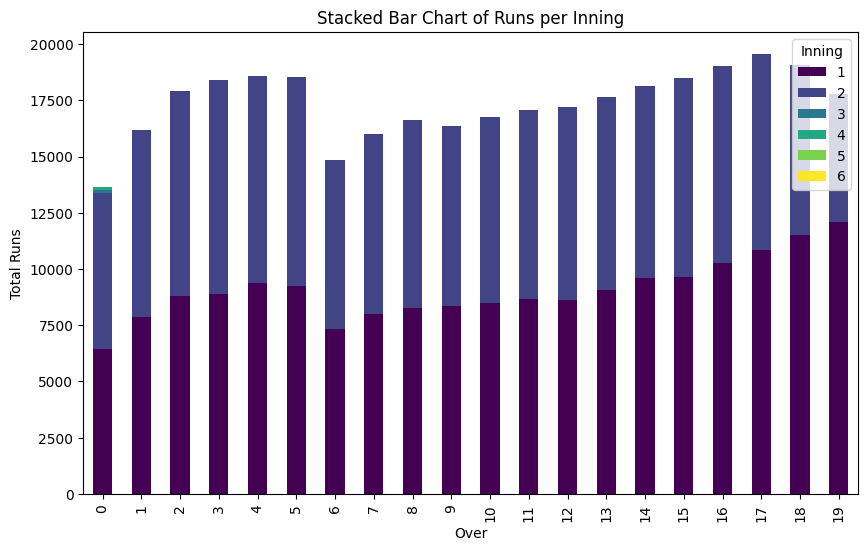

In [13]:
plt.figure(figsize=(10, 6))
inning_runs = df.groupby(["inning", "over"])["total_runs"].sum().unstack()
inning_runs.T.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Stacked Bar Chart of Runs per Inning")
plt.legend(title="Inning")
plt.show()

C:\Users\jyoth\AppData\Local\Temp\ipykernel_19420\3415965227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batters.values, y=top_batters.index, palette="viridis")


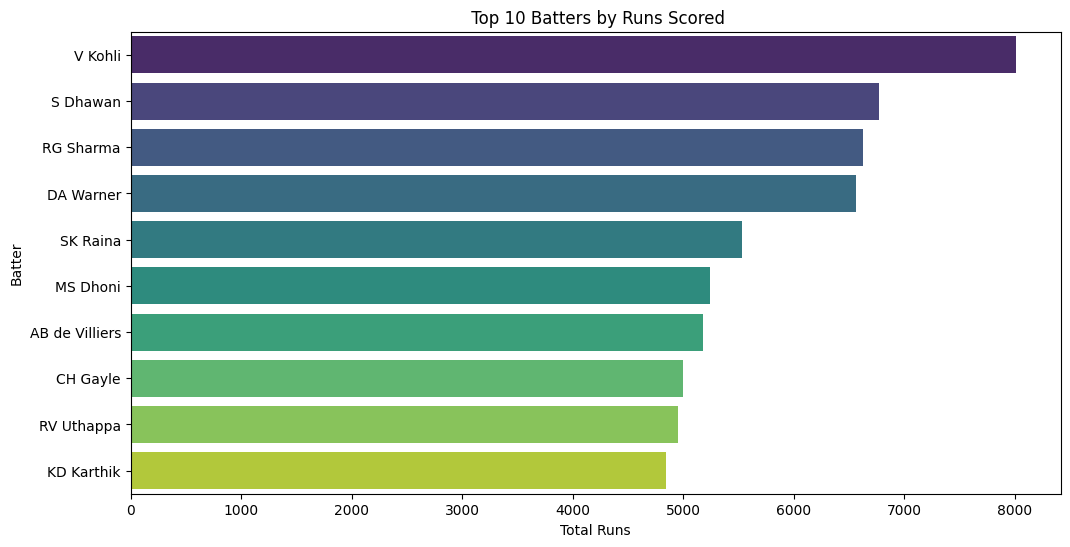

In [15]:
top_batters = df.groupby('batter')['batsman_runs'].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_batters.values, y=top_batters.index, palette="viridis")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.title(" Top 10 Batters by Runs Scored")
plt.show()

C:\Users\jyoth\AppData\Local\Temp\ipykernel_19420\3687913085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="magma")


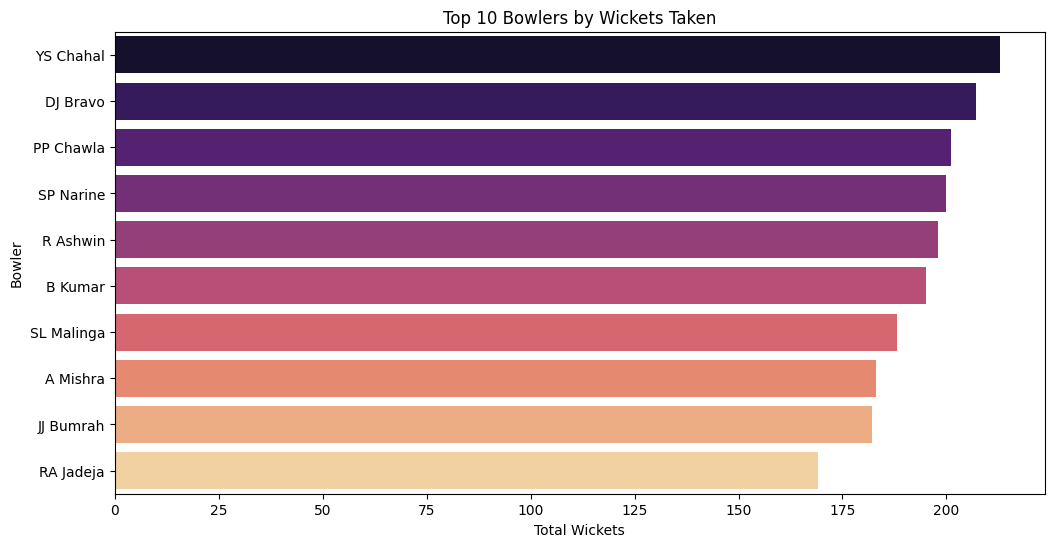

In [17]:
top_bowlers = df[df['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="magma")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 10 Bowlers by Wickets Taken")
plt.show()

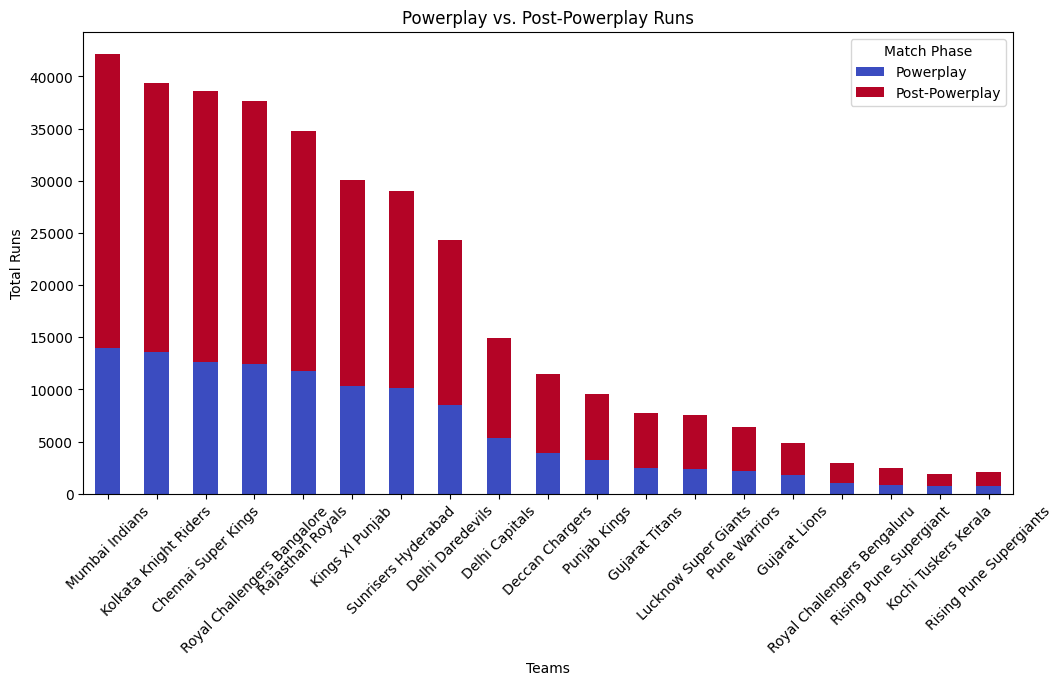

In [18]:
powerplay_runs = df[df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
post_powerplay_runs = df[df['over'] > 6].groupby('batting_team')['total_runs'].sum()
powerplay_df = pd.DataFrame({'Powerplay': powerplay_runs, 'Post-Powerplay': post_powerplay_runs})
powerplay_df.sort_values(by="Powerplay", ascending=False, inplace=True)
powerplay_df.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.xlabel("Teams")
plt.ylabel("Total Runs")
plt.title("Powerplay vs. Post-Powerplay Runs")
plt.legend(title="Match Phase")
plt.xticks(rotation=45)
plt.show()

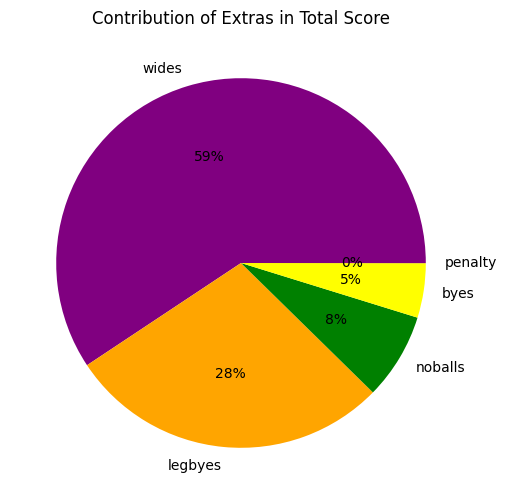

In [21]:
extra_types = df[df['extra_runs'] > 0]['extras_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(extra_types, labels=extra_types.index, autopct='%1.0f%%', colors=['purple', 'orange', 'green', 'yellow'])
plt.title("Contribution of Extras in Total Score")
plt.show()

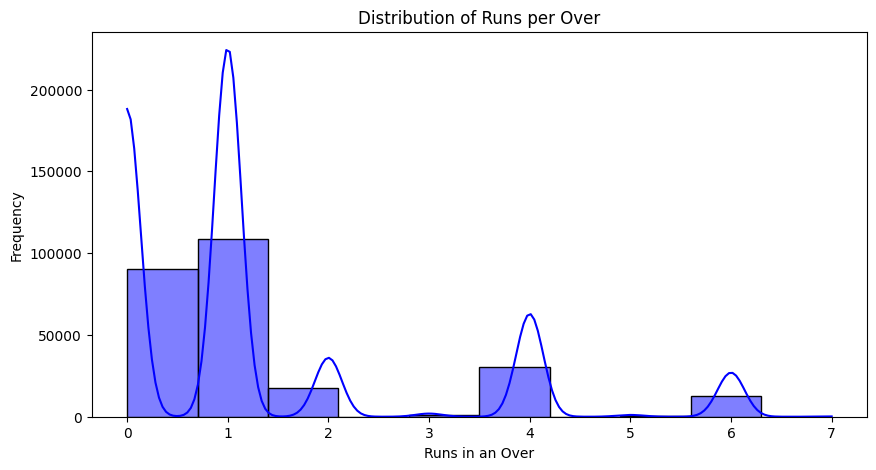

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_runs'], bins=10, kde=True, color='blue')
plt.xlabel("Runs in an Over")
plt.ylabel("Frequency")
plt.title("Distribution of Runs per Over")
plt.show()

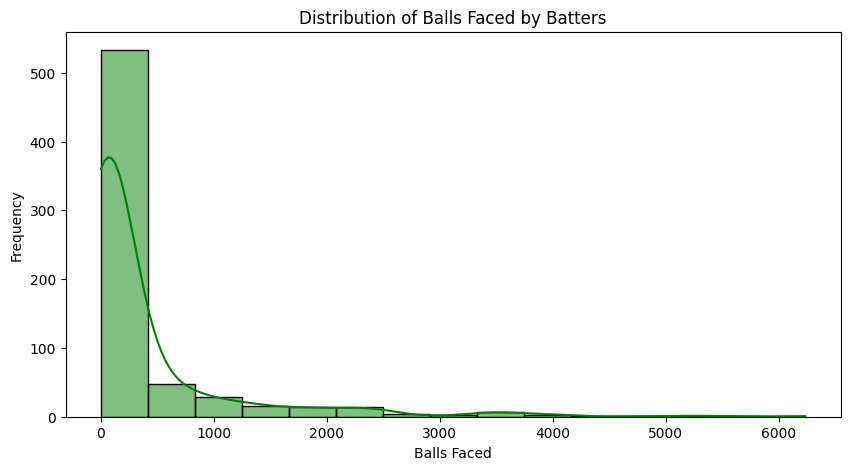

In [23]:
balls_faced = df.groupby('batter')['ball'].count()
plt.figure(figsize=(10,5))
sns.histplot(balls_faced, bins=15, kde=True, color='green')
plt.xlabel("Balls Faced")
plt.ylabel("Frequency")
plt.title("Distribution of Balls Faced by Batters")
plt.show()